# IMPORTS

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d

# READ CSV FILE TO PANDAS DATAFRAME

In [2]:
df=pd.read_csv("/Users/hassaanmuzammil/Downloads/ml-task/q-1-dataset/measurements.csv")
df

,WaistSide,WaistFront,WaistCircumference
0,270,333,982
1,243,352,976
2,211,302,845
3,231,308,884
4,278,344,966
...,...,...,...
494,261,334,961
495,282,333,994
496,214,300,833
497,233,300,857


# CHECK GENERAL RELATION OF WAIST CIRCUMFERENCE WITH SIDE AND FRONT

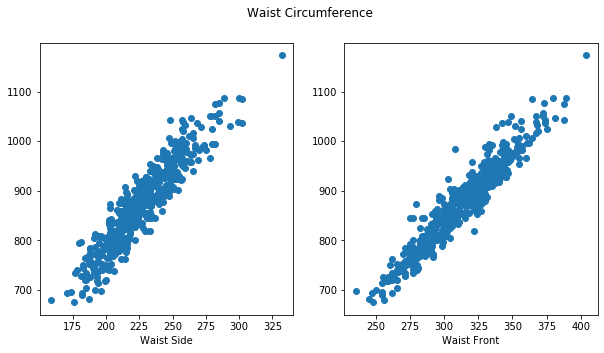

In [3]:
x1 = df['WaistSide']
x2 = df['WaistFront']
y = df['WaistCircumference']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x1,y)
plt.xlabel('Waist Side')

plt.subplot(1,2,2)
plt.scatter(x2,y)
plt.xlabel('Waist Front')

plt.suptitle('Waist Circumference')
plt.show()

# DEFINING FEATURES AND LABELS

In [4]:
X = df[['WaistSide','WaistFront']]
y = df['WaistCircumference']

# TRAIN-VAL-TEST SPLIT 

In [5]:
#train-val-test split in different ratios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [6]:
print('Train set:',len(X_train))
#print('Validation set:',len(X_val))
print('Test set:',len(X_test))

Train set: 399
Test set: 100


# MULTIPLE LINEAR REGRESSION SKLEARN

In [7]:
clf = LinearRegression().fit(X_train, y_train)
print('Train set score:',clf.score(X_train,y_train))
#print('Validation set score:',clf.score(X_val,y_val))
print('Test set score:',clf.score(X_test,y_test))

Train set score: 0.970486877172082
Test set score: 0.9747784336816213


# CHECK OPTIMIZED WEIGHTS

In [8]:
bias = clf.intercept_
weights = clf.coef_
print('Model Coefficients')
print('Bias:',bias)
print('Weights:',weights)

Model Coefficients
Bias: -9.22794373315321
Weights: [1.54472927 1.70542442]


# PREDICT WAIST CIRCUMFERENCE AND CALCULATE TOTAL LOSS

In [9]:
y_pred = clf.predict(X)
loss = np.sum((y-y_pred)**2) / 499
print('Total Loss:',loss)

Total Loss: 205.85822032394455


# DISPLAYING THE PLANE THAT REPRESENTS THE SOLUTION

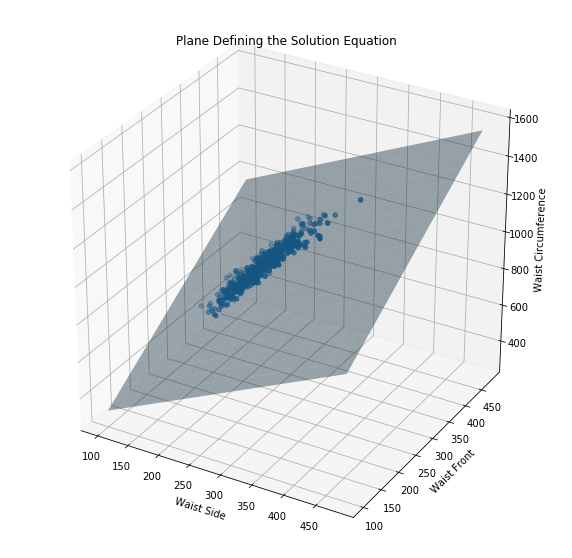

In [10]:
x = np.arange(100,500,20)
N = x.size
a,b = np.meshgrid(x,x)
it = np.array([b.ravel(),a.ravel(),np.ones(N)])
result = weights[0] * it[0] +  weights[1] * it[1] + bias

fig = plt.figure(figsize=(10,10))

y_pred = clf.predict(X)
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y, 'gray')
ax.plot_surface(it[0].reshape(N,N), it[1].reshape(N,N), result.reshape(N,N),alpha=0.4)

ax.set_xlabel('Waist Side')
ax.set_ylabel('Waist Front')
ax.set_zlabel('Waist Circumference')

ax.set_title('Plane Defining the Solution Equation')
plt.show()

# DISPLAYING PREDICTIONS AND ACTUAL VALUES

In [11]:
df['Predictions'] = y_pred
df

,WaistSide,WaistFront,WaistCircumference,Predictions
0,270,333,982,975.755290
1,243,352,976,966.450664
2,211,302,845,831.748106
3,231,308,884,872.875238
4,278,344,966,1006.872793
...,...,...,...,...
494,261,334,961,963.558151
495,282,333,994,994.292041
496,214,300,833,832.971445
497,233,300,857,862.321301
